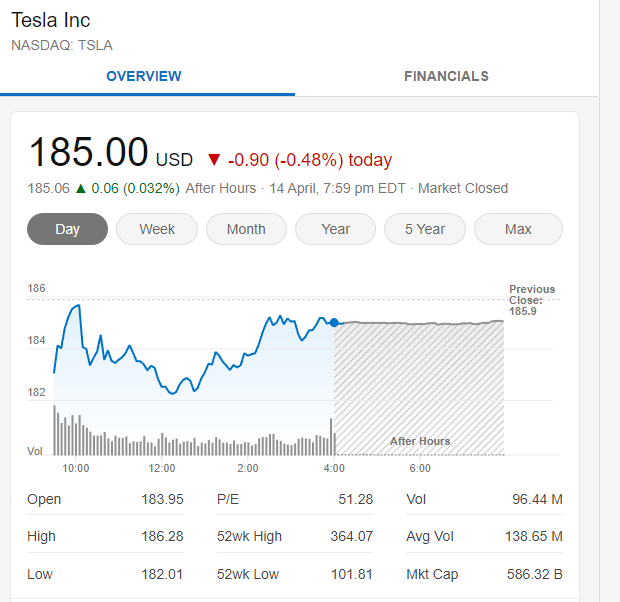
            STOCK PREDICTION ANALYSIS


# Importing Dataset as TSLA.CSV


Importing Dataset
The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2010 to 31st December 2017 which is for 8 years for the Tesla stocks.

You can download the CSV file from: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020 (you will have to replace “-” in date with “/”).

<!-- The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2010 to 31st December 2020 which is for 10 years for the Tesla stocks.

You can download the CSV file from: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020 (you will have to replace “-” in date with “/”). -->

In [2]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('d:TSLA.csv')


In [7]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,False
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,True
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,False
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,False
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,False


In [8]:
df.shape


(2416, 8)

In [9]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2416 non-null   object 
 1   Open            2416 non-null   float64
 2   High            2416 non-null   float64
 3   Low             2416 non-null   float64
 4   Close           2416 non-null   float64
 5   Adj Close       2416 non-null   float64
 6   Volume          2416 non-null   int64  
 7   is_quarter_end  2416 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 134.6+ KB


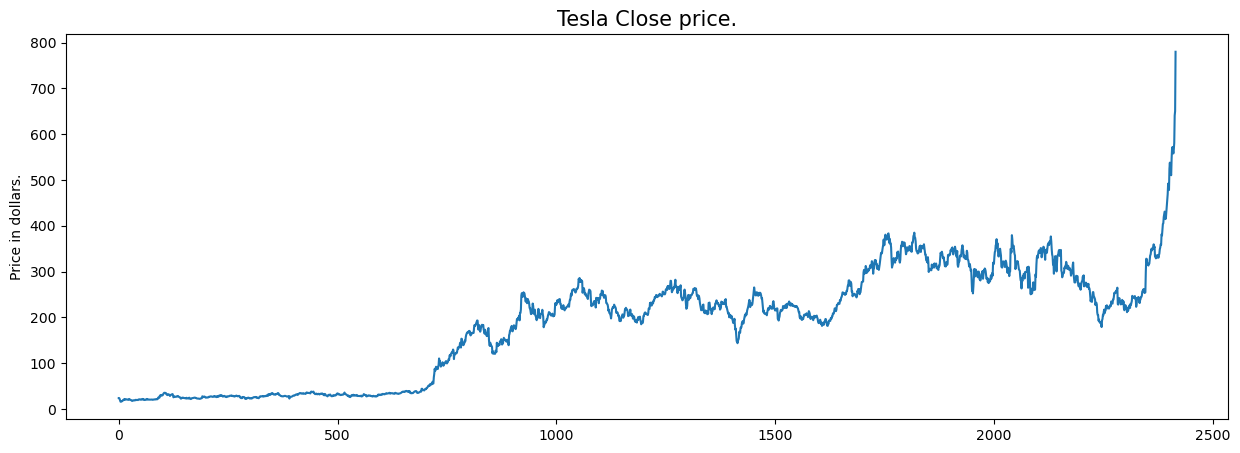

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [12]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,False
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,True
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,False
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,False
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,False


In [13]:
df[df['Close'] == df['Adj Close']].shape



(2416, 8)

<!-- If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.
 -->

In [14]:
df.isnull().sum()


Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
is_quarter_end    0
dtype: int64

In [15]:
# This implies that there are no null values in the data set provided.



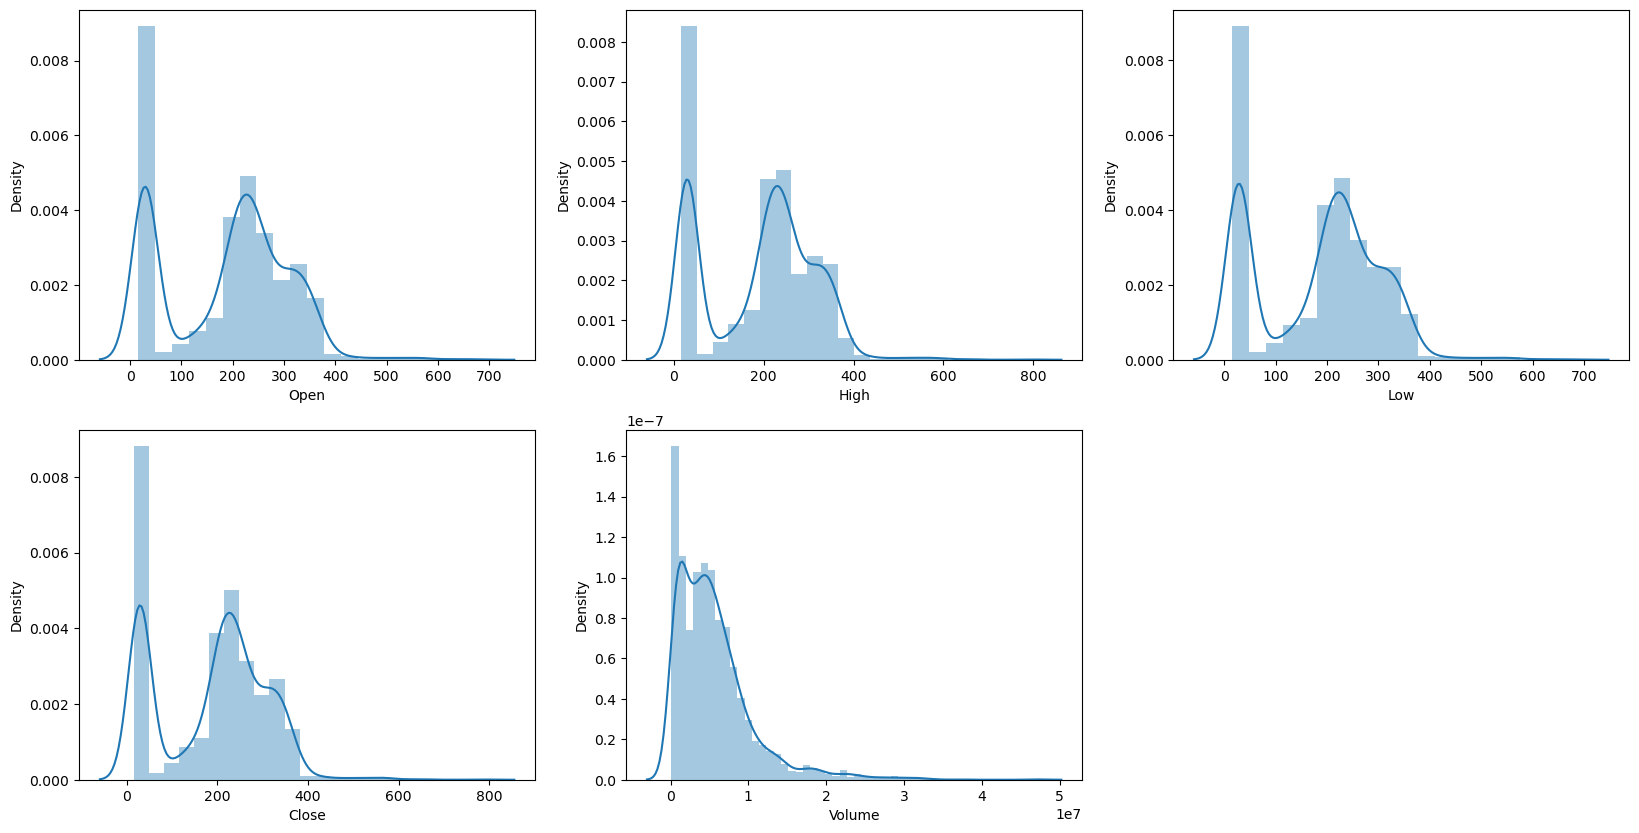

In [16]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

<!-- In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed. -->

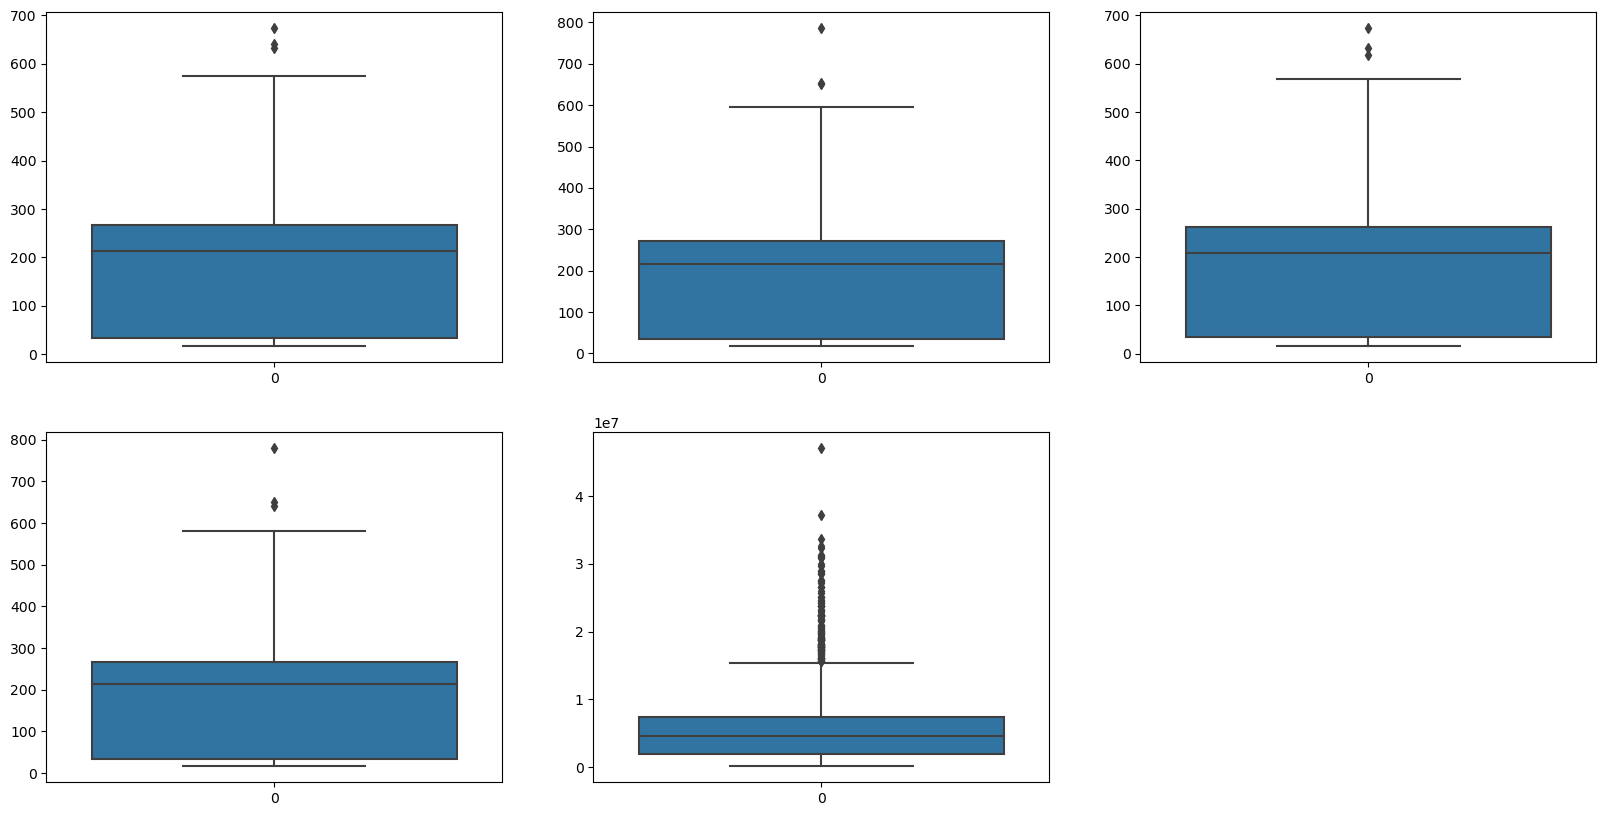

In [18]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

<!-- From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier. -->

# Feature Engineering
Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [20]:
# splitted = df['Date'].str.split('/', expand=True)
 
# df['day'] = splitted[1].astype('int')
# df['month'] = splitted[0].astype('int')
# df['year'] = splitted[2].astype('int')
 
# df.head()
# Split the 'Date' column into three new columns
splitted = df['Date'].str.split('/', expand=True)

# Verify that the 'splitted' variable contains the expected output
print(splitted.head())

            0
0  2010-06-29
1  2010-06-30
2  2010-07-01
3  2010-07-02
4  2010-07-06


In [21]:
# Reset the index of the DataFrame
df.reset_index(inplace=True, drop=True)

# Split the 'Date' column into three new columns
splitted = df['Date'].str.split('/', expand=True)

# Verify that the 'splitted' variable contains the expected output


In [22]:
print(splitted.head())

            0
0  2010-06-29
1  2010-06-30
2  2010-07-01
3  2010-07-02
4  2010-07-06


In [23]:
print(len(splitted[0]))  # should output 3



2416


In [24]:
import pandas as pd

# Create a sample DataFrame with a 'date' column
# data = {'date': ['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06']}
data =splitted
df = pd.DataFrame(data)




In [25]:
import pandas as pd

# load the Tesla stock data from the csv file
df = df = pd.read_csv('d:TSLA.csv', usecols=['Date'])

# split the 'Date' column into day, month, and year components
splitted = df['Date'].str.split('-', expand=True)
splitted.columns = ['year', 'month', 'day'] # rename the columns

# convert 'day', 'month', and 'year' columns to integers
splitted['day'] = splitted['day'].astype(int)
splitted['month'] = splitted['month'].astype(int)
splitted['year'] = splitted['year'].astype(int)

# print the resulting DataFrame
# print(splitted.head())


In [26]:
df['year'] = splitted['year']
df['day'] = splitted['day']
df['month'] = splitted['month']



In [27]:
print(splitted.head())


   year  month  day
0  2010      6   29
1  2010      6   30
2  2010      7    1
3  2010      7    2
4  2010      7    6


In [28]:
# splitted = df['Date'].str.split('/', expand=True)
 
# df['day'] = splitted[1].astype('int')
# df['month'] = splitted[0].astype('int')
# df['year'] = splitted[2].astype('int') did not work as date has only one column so indexing wont work 

In [29]:
df['is_quarter_end'] = np.where((splitted['day']==31) & ((splitted['month']==3) | (splitted['month']==6) | (splitted['month']==9) | (splitted['month']==12)), 1, 0)



In [30]:
print(df.head())




         Date  year  day  month  is_quarter_end
0  2010-06-29  2010   29      6               0
1  2010-06-30  2010   30      6               0
2  2010-07-01  2010    1      7               0
3  2010-07-02  2010    2      7               0
4  2010-07-06  2010    6      7               0


In [31]:
import pandas as pd

df = pd.read_csv('d:TSLA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['is_quarter_end'] = df['Date'].dt.is_quarter_end
df['is_quarter_end'].fillna(False, inplace=True) # fill NaN values with False
df.to_csv('d:TSLA.csv', index=False) # overwrite the original file


In [32]:
#So, in summary, the code df['is_quarter_end'] = np.where((splitted['day']==31) & 
# ((splitted['month']==3) | (splitted['month']==6) | (splitted['month']==9) | 
# (splitted['month']==12)), 1, 0) creates a new column in the original 
# DataFrame df that identifies whether a given date is the end of a quarter 
# (i.e., March 31, June 30, September 30, or December 31)


In [33]:
import pandas as pd

df = pd.read_csv('d:TSLA.csv', usecols=['Date', 'Open', 'High', 'Low', 'Close'])
df['Date'] = pd.to_datetime(df['Date'])


In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year


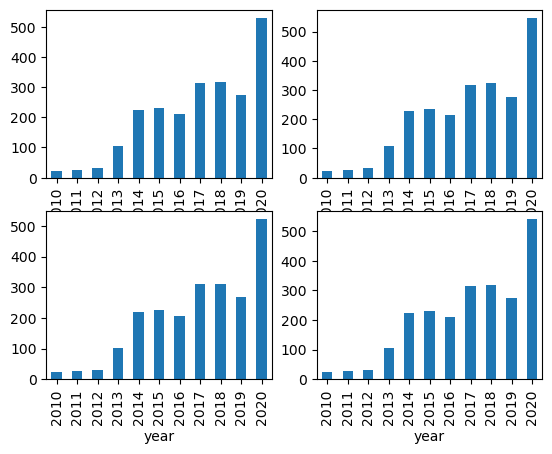

In [35]:
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    df.groupby('year')[col].mean().plot.bar()
plt.show()
#this code does not work unless we excute the above line of code ib line 70[ key error in year]


In [36]:
print(df.columns)   # print column names
print(df)           # print DataFrame contents



Index(['Date', 'Open', 'High', 'Low', 'Close', 'year'], dtype='object')
           Date        Open        High         Low       Close  year
0    2010-06-29   19.000000   25.000000   17.540001   23.889999  2010
1    2010-06-30   25.790001   30.420000   23.299999   23.830000  2010
2    2010-07-01   25.000000   25.920000   20.270000   21.959999  2010
3    2010-07-02   23.000000   23.100000   18.709999   19.200001  2010
4    2010-07-06   20.000000   20.000000   15.830000   16.110001  2010
...         ...         ...         ...         ...         ...   ...
2411 2020-01-28  568.489990  576.809998  558.080017  566.900024  2020
2412 2020-01-29  575.690002  589.799988  567.429993  580.989990  2020
2413 2020-01-30  632.419983  650.880005  618.000000  640.809998  2020
2414 2020-01-31  640.000000  653.000000  632.520020  650.570007  2020
2415 2020-02-03  673.690002  786.140015  673.520020  780.000000  2020

[2416 rows x 6 columns]


In [37]:
# df.groupby('is_quarter_end').mean()
df.groupby(df['Date'].dt.is_quarter_end).mean()



,Open,High,Low,Close,year
Date,,,,,
False,186.263032,189.575341,182.908703,186.400828,2014.782936
True,187.047200,189.853998,183.675600,186.673597,2014.200000


In [38]:
df['is_quarter_end'] = df['Date'].dt.is_quarter_end


In [39]:
# create a separate column of is_quarter_end
# df['is_quarter_end'] = df['Date'].dt.is_quarter_end

# print is_quarter_end as a separate column
# print(df['is_quarter_end'])

# group by is_quarter_end and print mean
print(df.groupby('is_quarter_end').mean())

# group by is_quarter_end using 'Date' column and print mean


                      Open        High         Low       Close         year
is_quarter_end                                                             
False           186.263032  189.575341  182.908703  186.400828  2014.782936
True            187.047200  189.853998  183.675600  186.673597  2014.200000


In [40]:
print(df.groupby(df['Date'].dt.is_quarter_end).mean())


             Open        High         Low       Close         year  \
Date                                                                 
False  186.263032  189.575341  182.908703  186.400828  2014.782936   
True   187.047200  189.853998  183.675600  186.673597  2014.200000   

       is_quarter_end  
Date                   
False             0.0  
True              1.0  


In [41]:
df.groupby(df['Date'].dt.is_quarter_end)['Open', 'High', 'Low', 'Close'].mean()


,Open,High,Low,Close
Date,,,,
False,186.263032,189.575341,182.908703,186.400828
True,187.047200,189.853998,183.675600,186.673597


In [42]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'year', 'is_quarter_end'], dtype='object')


In [43]:
import pandas as pd

# Read the csv file
df = pd.read_csv('d:TSLA.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column 'is_quarter_end'
df['is_quarter_end'] = df['Date'].dt.is_quarter_end
df['is_quarter_end'].fillna(False, inplace=True)

# Add a new column 'Volume'
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Group by 'is_quarter_end' and take the mean of all columns including 'Volume'
grouped_df = df.groupby(df['is_quarter_end'])[df.columns].mean()

# Print the grouped dataframe
print(grouped_df)


                      Open        High         Low       Close   Adj Close  \
is_quarter_end                                                               
False           186.263032  189.575341  182.908703  186.400828  186.400828   
True            187.047200  189.853998  183.675600  186.673597  186.673597   

                      Volume  is_quarter_end  
is_quarter_end                                
False           5.576226e+06             0.0  
True            5.237564e+06             1.0  


In [44]:
# add a volume column in the existing df first then on that df do the group by 



In [45]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

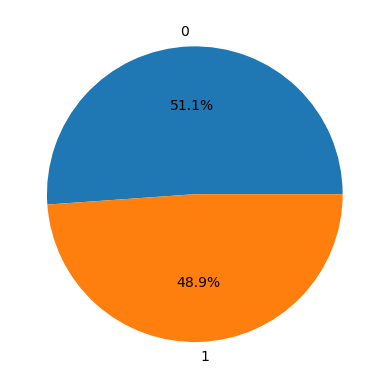

In [46]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

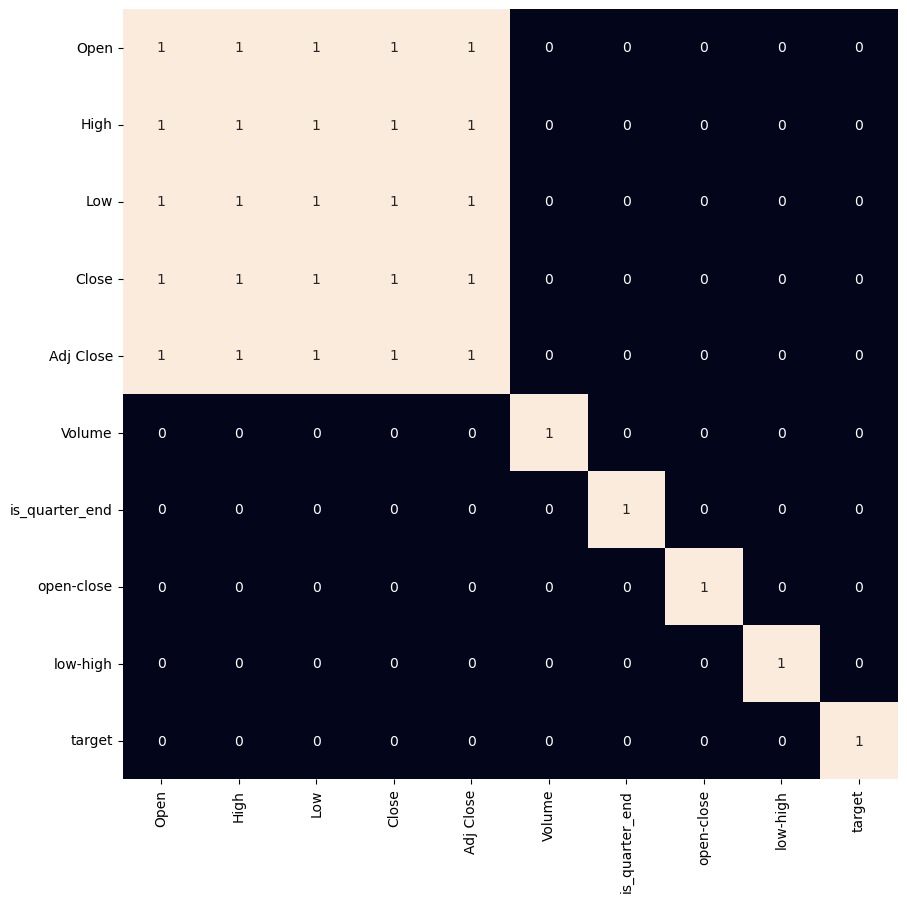

In [47]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

# Data Splitting and Normalization


In [48]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


In [49]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.507736107054107
Validation Accuracy :  0.4956896551724137

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5371632863003086
Validation Accuracy :  0.48330596606458676

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

In [50]:
# metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
# plt.show()
# AttributeError                            Traceback (most recent call last)
# Cell In[107], line 1
# ----> 1 metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
#       2 plt.show()

# AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [51]:
!pip install --upgrade scikit-learn


In [52]:
import sklearn
print(sklearn.__version__)

1.2.2


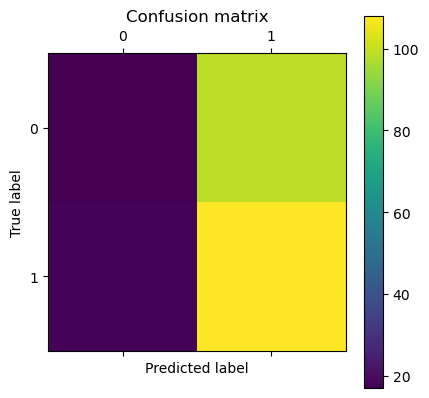

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# calculate the confusion matrix
cm = confusion_matrix(Y_valid, models[0].predict(X_valid))

# plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [54]:
# Conclusion:
# We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply 
# guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model
# to perform such a complex task as Stock Market prediction.